# Make efficiency map plots for trained fitters

In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import matplotlib.pyplot as plt
#plt.style.use('seaborn-ticks')
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook

import numpy as np

from pprint import pprint

# import xgboost

Welcome to JupyROOT 6.08/06


load the fitter:

In [2]:
path,name = "./classifiers","effGenVarClass_out"
fitter = tn.IO.load(name,path,nodata=True)

loading pickle ./classifiers/effGenVarClass_out.pkl.gz


In [3]:
def plot_efficiency_map(fitter,feedClass=True):
    """
    This function is still in the developpment phase
    So far it is used to produce efficiency plots of Pt vs |y|
    : params 
            fitter : train.EffFitter - the trained classifier
         feedClass : boolean - has influence only on recoPtGrid which is never used
    """
    
    #generate 300 pt bins from 0-300 and 300 pseudo-rap bins from 0-3
    class_grid,class_eff_map = fitter.effMap('class',[(300,0,300),(300,0,3.)])
    
        
    """
    ? This variable recoPtGrid is never used
    """    
    recoPtGrid =  np.hstack([class_grid,class_eff_map]) if feedClass else class_grid
    
    #x=|y| and y=pT
    plotting.efficiency_map(class_grid[:,1],class_grid[:,0],class_eff_map,figsize=(21,14),xlabel="|y|",ylabel=r"$p_T$",
                        layout=(3,None))
    
    plt.subplots_adjust(hspace = 0.25, wspace = 0.3, top=0.88)


### What are the variables class_grid and class_eff_map ?

first we bin the variables we are interested in. In this case $p_T$ and $|y|$.

$$ 
    \begin{equation}
        \begin{aligned}
            p_T &\in [0,300] \text{ with 300 bins} \\
            |y| &\in [0,3] \text{ with 300 bins}
        \end{aligned}
    \end{equation}
$$

Thus, there are $300 \times 300 = 90000$ bins on a $p_t$-$|y|$ grid. This grid is saved in the variable <font color='red'>class_grid</font> in form of a $90000 \times 2$ matrix:

$$
    \begin{pmatrix}
        p_T = 0.5 & |y| = 0.005 \\
        p_T = 0.5 & |y| = 0.010 \\
        \vdots & \vdots \\
        p_T = 0.5 & |y| = 0.295 \\
        p_T = 1.0 & |y| = 0.005 \\
        p_T = 1.0 & |y| = 0.010 \\
        \vdots & \vdots   
    \end{pmatrix}
$$

The variable <font color='red'>class_eff_map</font> is a $90000 \times 4$ matrix storing the probability/efficiency of each category 0,1,2,3 in the correspnding $p_T$-$|y|$ bin.


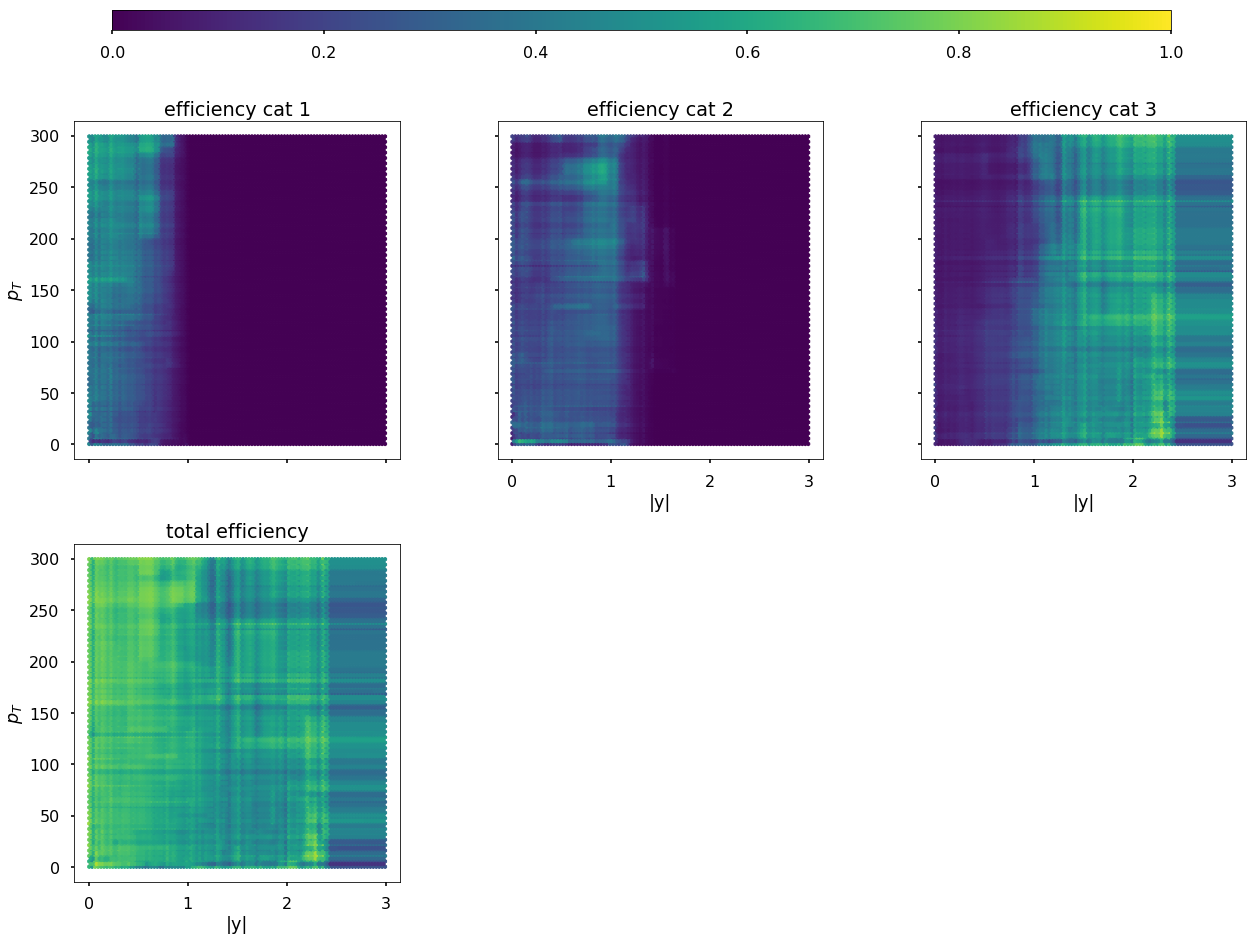

In [9]:
reload(plotting)
plot_efficiency_map(fitter)

# work still in progress from here on

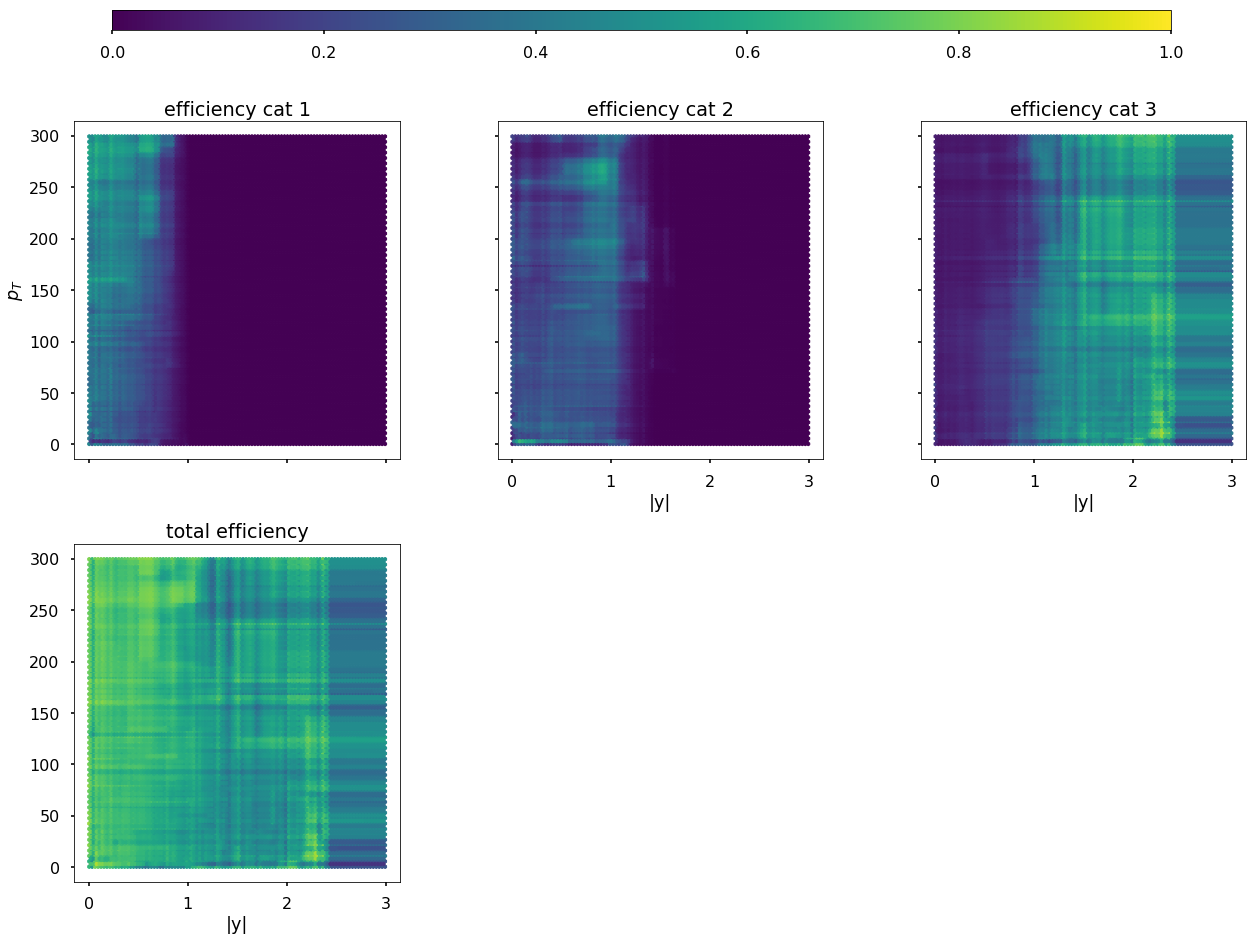

In [11]:
plot_efficiency_map(fitter,False)

In [5]:
%%bash

ls jobs

ls: cannot access 'jobs': No such file or directory


In [6]:
# path,name = "jobs/Train_Configurable_binned_3495","Train_Configurable_binned_3495"

path,name = "jobs/Train_Configurable_binned_16569","Train_Configurable_binned_16569"
fitter = tn.IO.load(name,path,nodata=True)

IOError: [Errno 2] No such file or directory: 'jobs/Train_Configurable_binned_16569/Train_Configurable_binned_16569.pkl.gz'

[[  5.00000000e-01   5.00000000e-03]
 [  5.00000000e-01   1.50000000e-02]
 [  5.00000000e-01   2.50000000e-02]
 ..., 
 [  2.99500000e+02   2.97500000e+00]
 [  2.99500000e+02   2.98500000e+00]
 [  2.99500000e+02   2.99500000e+00]]


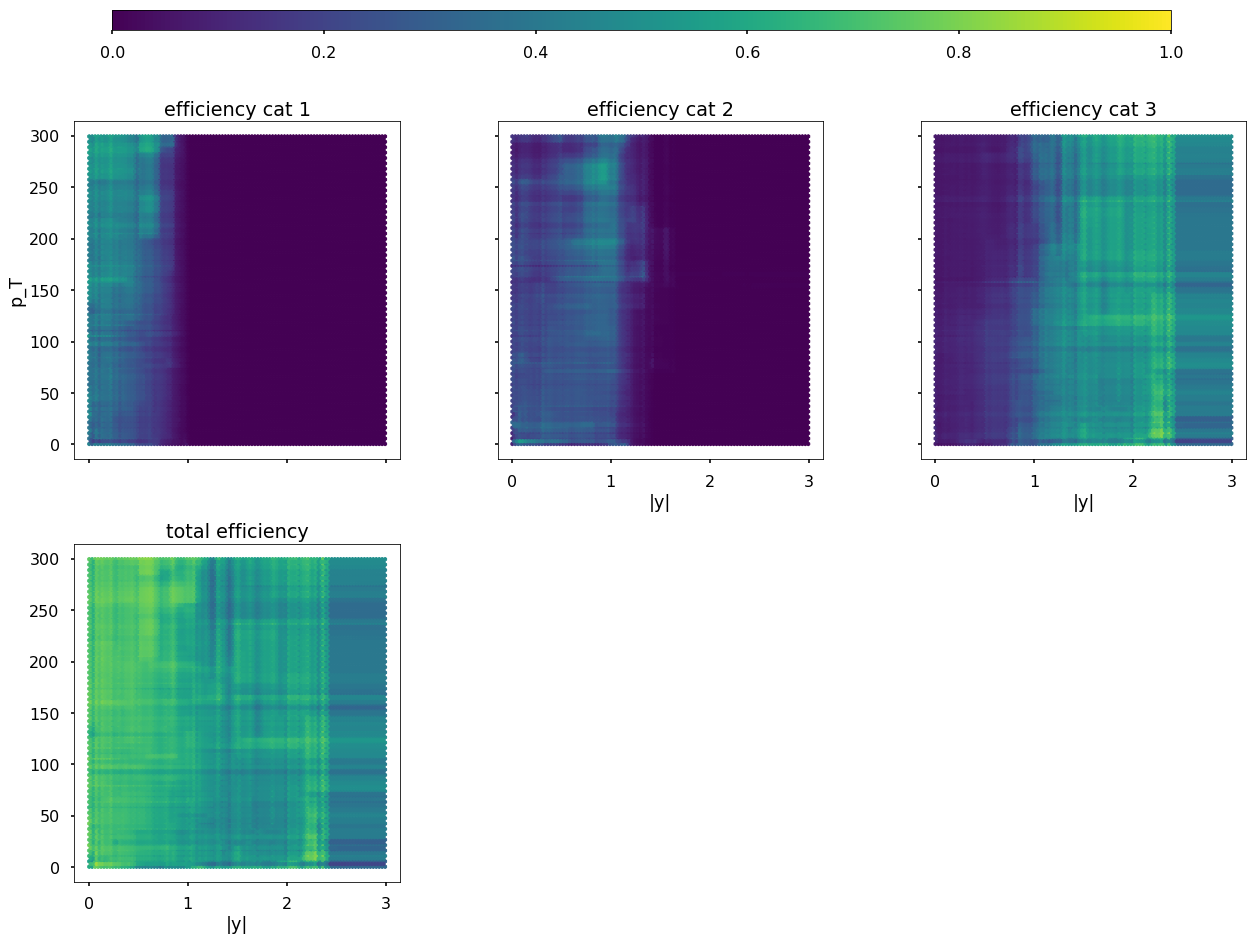

In [7]:
plot_efficiency_map(fitter,False)